# **1. Perkenalan Dataset**


Menggunakan dataset Students Performance in Exams yang diambil dari [**Kaggle**](https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics), dataset ini mencakup informasi tentang kinerja siswa dalam ujian berbagai mata pelajaran, serta data terkait latar belakang pribadi dan pendidikan orang tua mereka.

Dengan setiap baris mewakili seorang siswa dan hasil ujian mereka, dataset ini terdiri dari sekitar 1000 baris di mana sangat berguna untuk mengidentifikasi faktor-faktor yang mempengaruhi performa akademik siswa serta untuk membangun model prediktif dalam memproyeksikan hasil ujian berdasarkan data demografis dan kebiasaan belajar mereka.

Dataset ini berisi 8 kolom utama, yang mencakup informasi sebagai berikut:

1. gender: Menunjukkan jenis kelamin siswa (male/female)
2. race/ethnicity: Mengelompokkan siswa berdasarkan ras atau etnis (misalnya: group A, group B, dan seterusnya)
3. parental level of education: Menyatakan tingkat pendidikan yang telah dicapai oleh orang tua siswa
4. lunch: Mencatat jenis layanan makan siang yang diterima oleh siswa (standard/reduced)
5. test preparation course: Menginformasikan apakah siswa mengikuti kursus persiapan ujian (completed/none)
6. math score: Skor ujian matematika siswa (skala 0-100)
7. reading score: Skor ujian membaca siswa (skala 0-100)
8. writing score: Skor ujian menulis siswa (skala 0-100)

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

Di sini, saya menggunakan library dasar untuk manipulasi data dan visualisasi, serta library untuk preprocessing dan machine learning.


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [67]:
df = pd.read_csv("../dataset_raw/StudentsPerformance_raw.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [68]:
print(f'Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.\n')

df.info()

Dataset memiliki 1000 baris dan 8 kolom.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Mengecek statistik deskriptif



In [69]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Mengecek missing values

In [70]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Mengecek jumlah data duplikat

In [71]:
print("Jumlah Duplikat:", df.duplicated().sum())

Jumlah Duplikat: 0


Plot distribusi skor

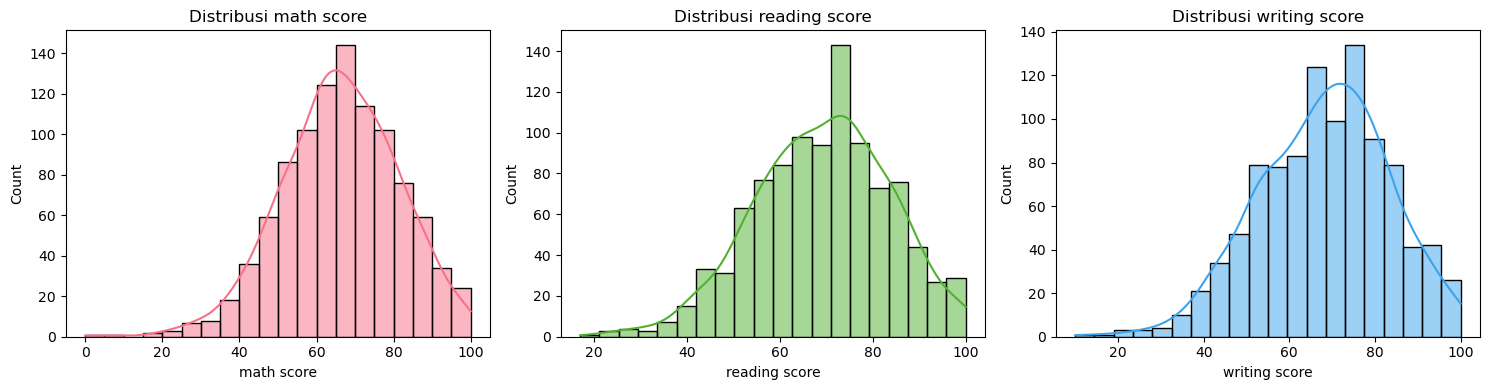

In [72]:
plt.figure(figsize=(15, 4))

colors = sns.color_palette('husl', n_colors=3)
for i, subject in enumerate(['math score', 'reading score', 'writing score']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[subject], kde=True, bins=20, color=colors[i], edgecolor='black')
    plt.title(f'Distribusi {subject}')

plt.tight_layout()
plt.show()

Visualisasi korelasi antar fitur

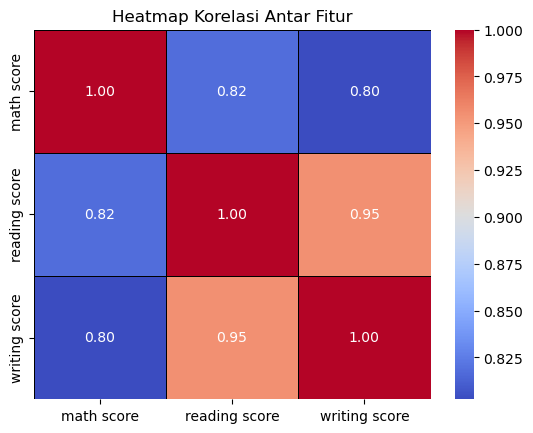

In [73]:
student_scores = df[['math score', 'reading score', 'writing score']]

sns.heatmap(student_scores.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

Visualisasi statistik deskriptif

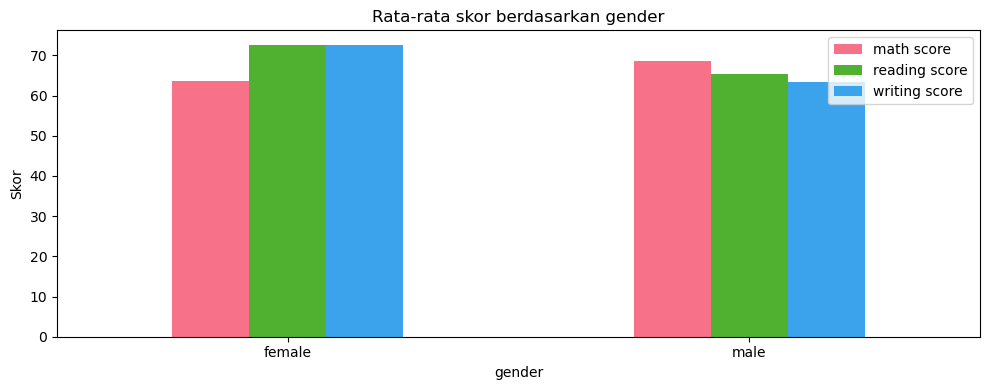

In [74]:
plt.figure(figsize=(10, 4))

mean_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
mean_scores.plot(kind='bar', color=sns.color_palette('husl', n_colors=3), ax=plt.gca())

plt.title('Rata-rata skor berdasarkan gender')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Mengecek missing values

In [75]:
print("Missing Values:\n")
print(df.isnull().sum())

Missing Values:

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Tidak ada missing values, sehingga tidak perlu lakukan tindakan menangani data kosong

Mengecek jumlah data duplikat

In [76]:
print("Jumlah Duplikat:", df.duplicated().sum())

Jumlah Duplikat: 0


Tidak ada data duplikat, sehingga tidak perlu lakukan tindakan menghapus data duplikat

Menghitung gabungan untuk melakukan skor rata rata

In [77]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [78]:
def score_to_grade(score):
    if score >= 85:
        return 'A'
    elif score >= 75:
        return 'B'
    elif score >= 60:
        return 'C'
    elif score >= 50:
        return 'D'
    else:
        return 'E'

df['performance_level'] = df['average_score'].apply(score_to_grade)

In [79]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,performance_level
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


In [80]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

Checking outlier

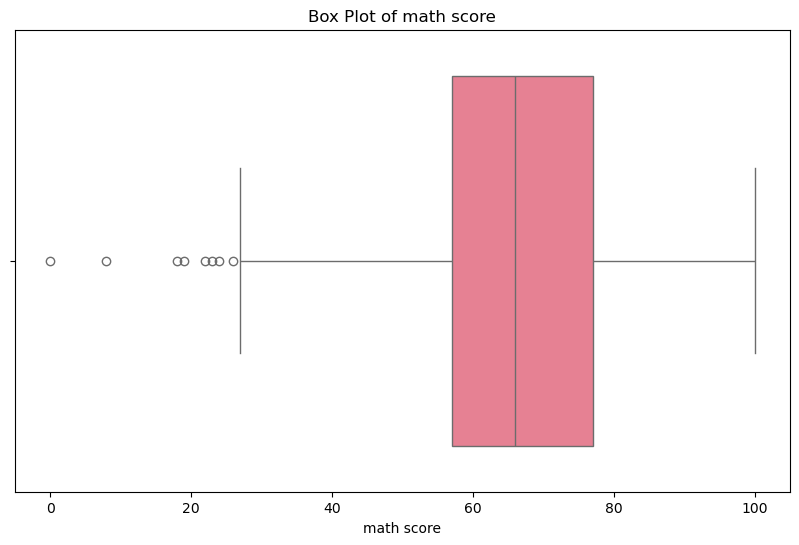

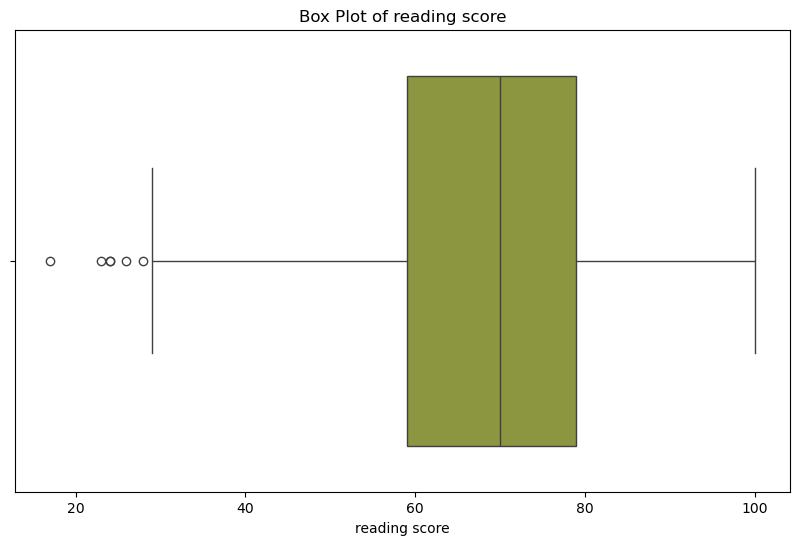

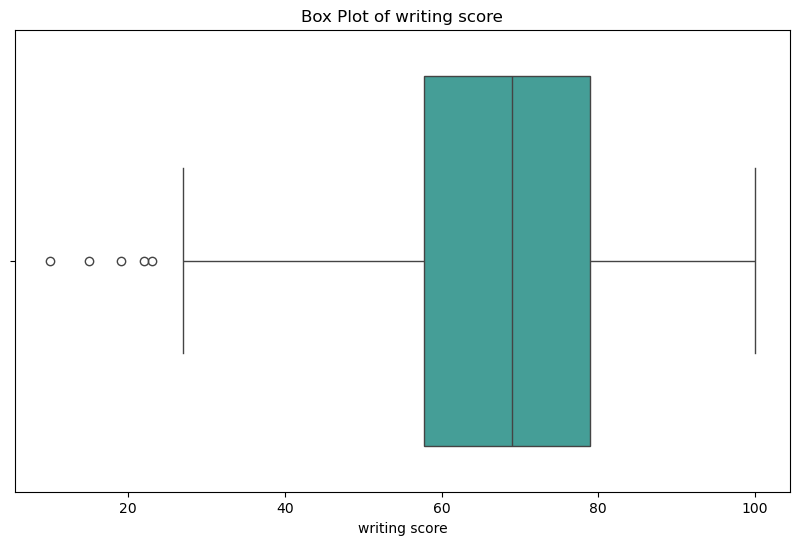

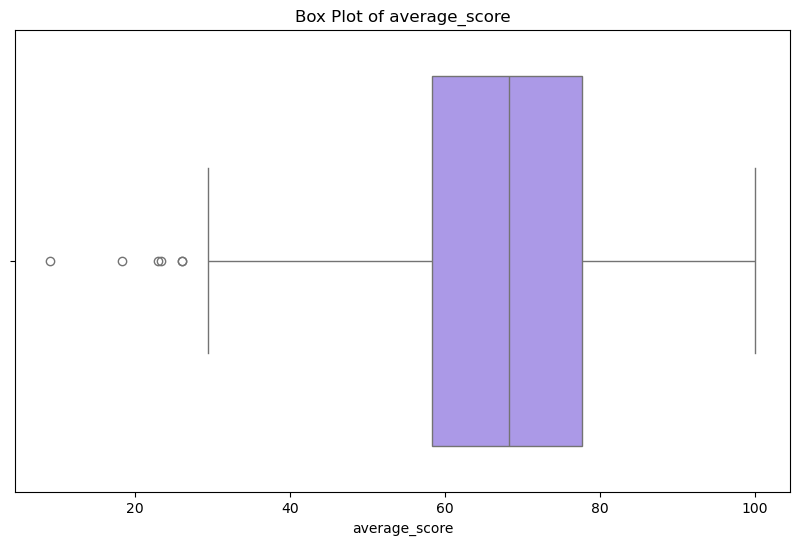

In [81]:
colors = sns.color_palette('husl', n_colors=len(numeric_columns))

for idx, outlier in enumerate(numeric_columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[outlier], color=colors[idx])
    plt.title(f'Box Plot of {outlier}')
    plt.show()

Fungsi untuk mendeteksi outlier menggunakan IQR

In [82]:
def detect_outliers_IQR(df):
    outlier_indices = []
    for col in df.select_dtypes(include=['int64', 'float64']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices.extend(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
    return set(outlier_indices)

outliers = detect_outliers_IQR(df)
df = df.drop(index=outliers)

print(f'Data After Removing Outliers: {df.shape}')

Data After Removing Outliers: (988, 10)


Handling outlier

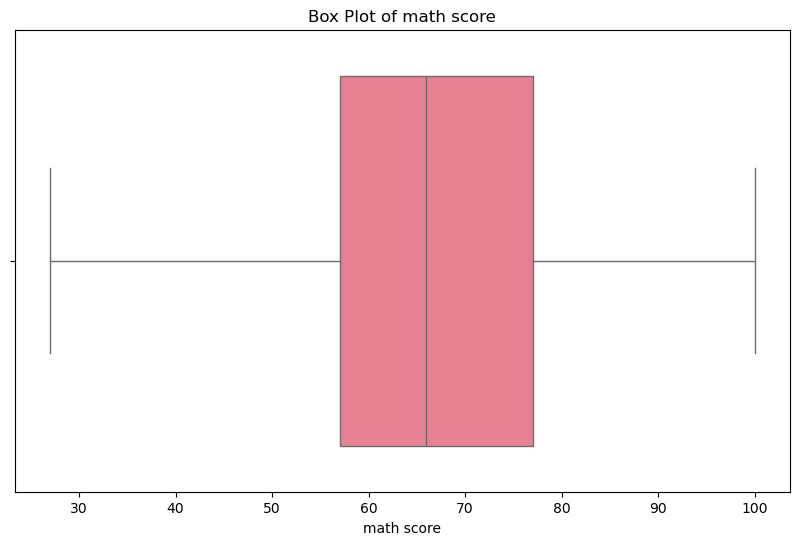

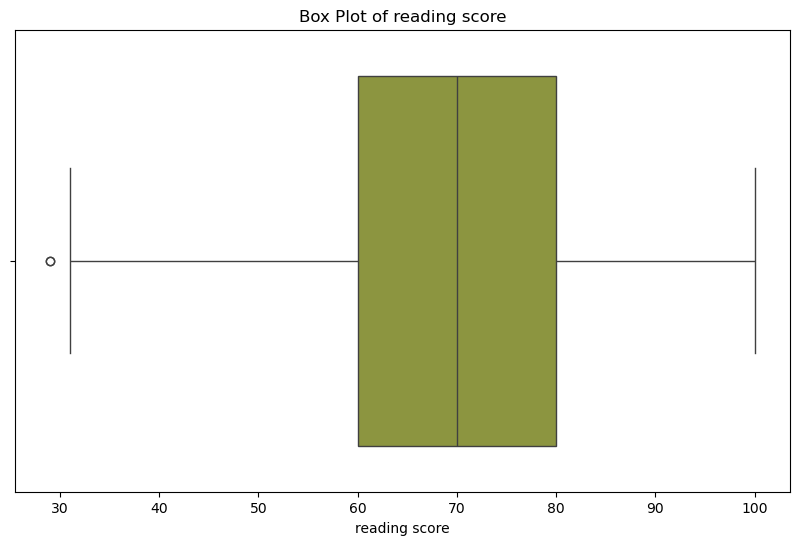

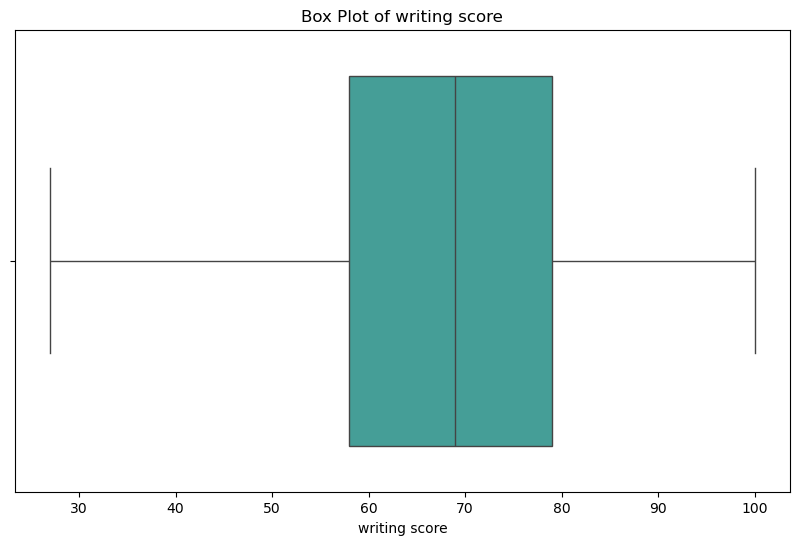

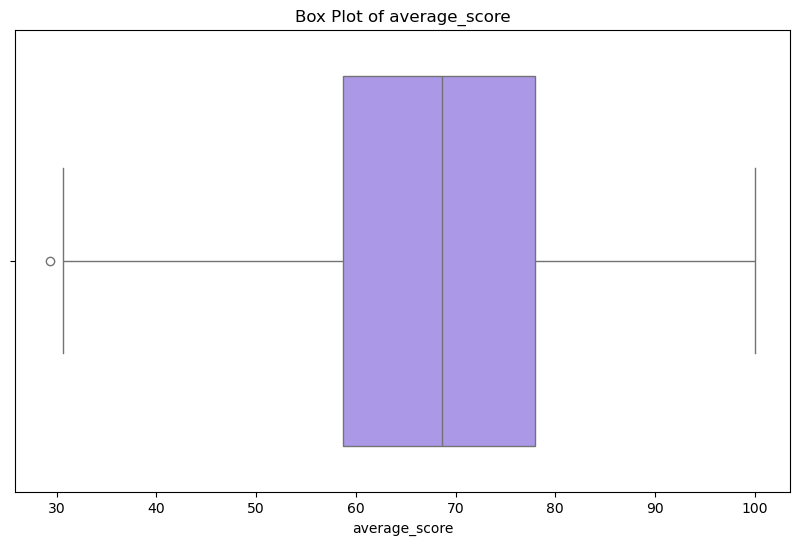

In [83]:
colors = sns.color_palette('husl', n_colors=len(numeric_columns))

for idx, outlier in enumerate(numeric_columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[outlier], color=colors[idx])
    plt.title(f'Box Plot of {outlier}')
    plt.show()

In [84]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

Untuk memisahkan fitur dan target

In [85]:
X = df_encoded.drop(['math score', 'reading score', 'writing score', 'average_score', 'performance_level'], axis=1)
y = df_encoded['performance_level']

Split data

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Standarisasi data

In [87]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ekspor csv hasil preprocessing

In [88]:
df_encoded.to_csv('dataset_preprocessed/students_performance_preprocessed.csv', index=False)